Title: Physical Neuron Models
Author: Thomas M. Breuel
Institution: UniKL

In [2]:

from IPython.core.display import Image 
def fig(x): return Image(filename="Figures/"+x+".png") 
from pylab import *
def figs(*args):
    for i,f in enumerate(args):
        subplot(1,len(args),i+1)
        axis("off")
        fig = imshow(imread("Figures/"+f+".png"))

# Experiments on Single Neurons

We already talked about voltages in neurons before.


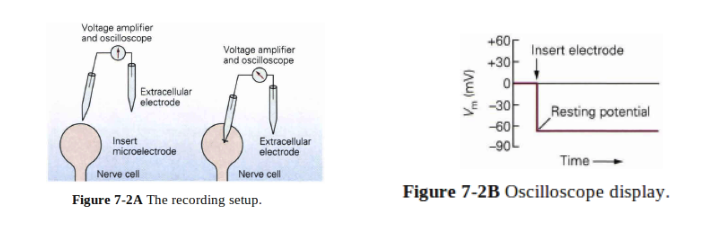

In [4]:
# measuring the membrane potential
figsize(12,6)
figs("membrane-potential","membrane-potential-output")

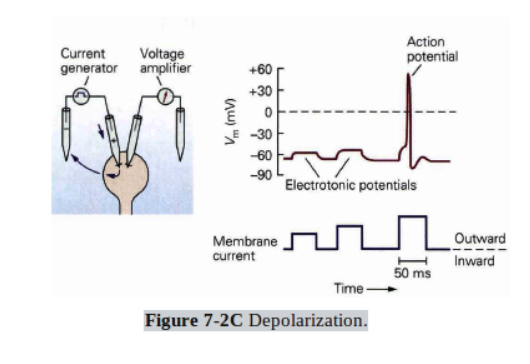

In [5]:
# depolarization
figs("depolarization")

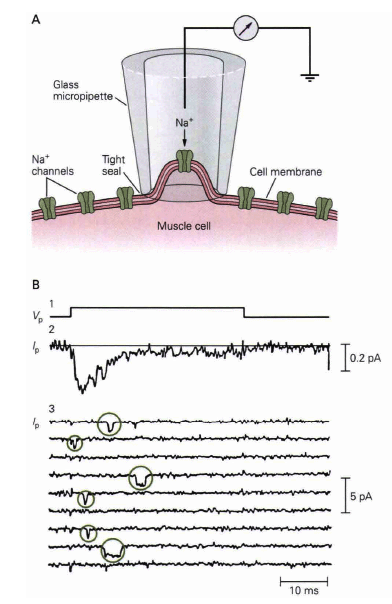

In [6]:
# patch clamping and channels
fig("patch-clamping")

# Channels and Ions

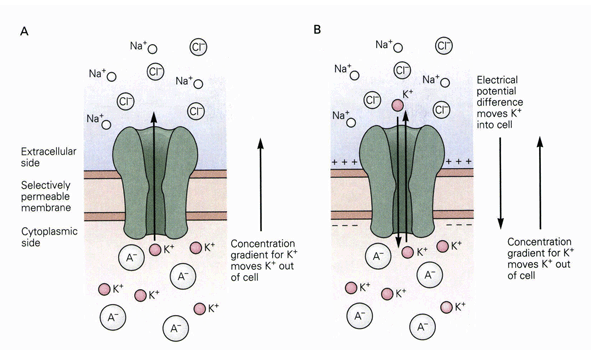

In [7]:
# electrical signals from ion movements
fig("potassium-channels")

(Nernst Equation)

The Nernst equation gives us the _equilibrium potential_, that is
the voltage across the membrane at which ions of that species don't move.

$$E_x = \frac{RT}{zF} \ln \frac{[X]_O}{[X]_I}$$

$$E_x = \frac{58 mV}{z} \log \frac{[X]_O}{[X]_I}$$

$$E_x = \frac{58 mV}{1} \log \frac{20}{400} = -75 mV$$

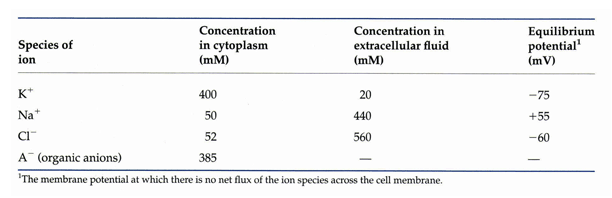

In [8]:
# Nernst potentials for important ions
fig("nernst-potentials")

Setup:

- concentration gradients for potassium, sodium, chloride ions
- channels that can selectively pass ions of one species through the cell membrane
- if we open sodium channels, the potential will move towards the sodium eq. potential
- if we open potassium channels, the potential will move towards the potassium eq. potential

# Behavior of One Channel Species

Given an ion species $i$, the current flowing through the ion channel is given by:

$$ I_i = g_i(V_m - V_i) $$

Here:

- $I_i$ is the current
- $g_i$ is the conductance of the ion channel
- $V_m$ is the current membrane potential
- $V_i$ is the Nernst (resting) potential for that ion

Assuming just a single membrane patch, this current just flows in order to charge the capacitor formed by the membrane. So, we get for a single membrane patch and a single channel and ion type:

$$ C\frac{dV}{dt} = -I_i $$

Or

$$ dV = - \frac{1}{C} I_i dt = -\frac{1}{C} g_i (V-V_I) dt $$

We can integrate this differential equation directly.

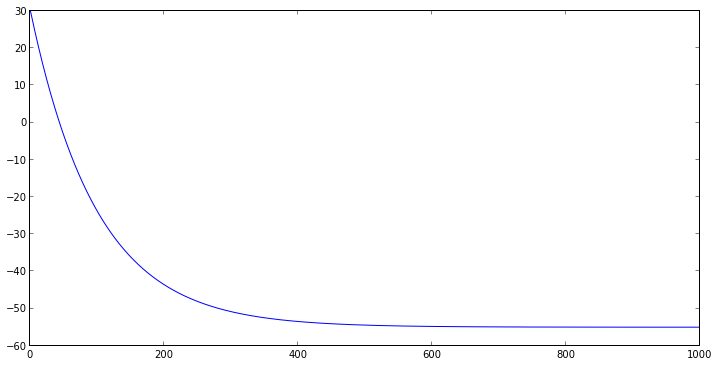

In [42]:
Vi = -55
V = 30
Vs = []
dt = 0.01
for i in range(1000):
    Vs.append(V)
    V += -(V-Vi)*dt
plot(Vs)

What we have done here is to convert a _differential equation_ into a _difference equation_ in order to solve it numerically. This is a common approach to solving differential equations (although there are many others).

# Action Potentials

These components turn into a kind of "flip flop" circuit because of the presence of
_voltage sensitive channels_.

- sodium channels open in response to a rise in voltage
- because sodium channels open, the voltage rises further, causing more sodium channels to open
- this is a runaway feedback mechanism


To reset the whole circuit, the sodium channels close after a short amount of time
and potassium channels open.

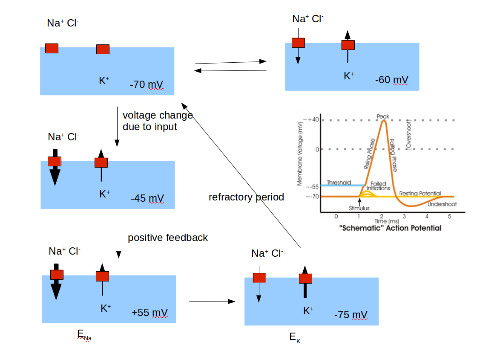

In [16]:
figs("action-potential")

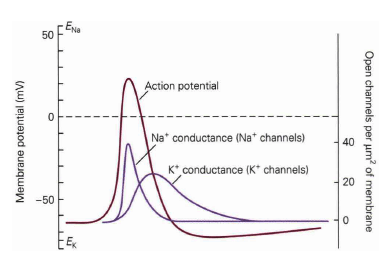

In [12]:
fig("conductances")

# Hodgkin-Huxley Model

(Differential Equations)

We can convert this model into a set of differential equations:

$$ C\frac{dV}{dt} = -I_{Na}-I_K-I_l+I_e $$

Here, $I_e$ is some external current, say from a synapse. And $I_l$ is a "leak current" accounting for all other ions.

Expanded, this turns into:

$$ C\frac{dV}{dt} = -g_L (V-V_{Na}) - g_K (V-V_K) - g_l (V-V_l) + I_e $$


(Hodgkin-Huxley with Time and Voltage Dependences)

$$ C\frac{dV}{dt} = -g_L(V,t) (V-V_{Na}) - g_K(V,t) (V-V_K) - g_l(V,t) (V-V_l) + I_e(t) $$

Note that this is basically just the equations governing a simple electrical circuit composed of batteries, capacitors, and (variable) resistors. We're in electrical engineering and circuit theory territory now.



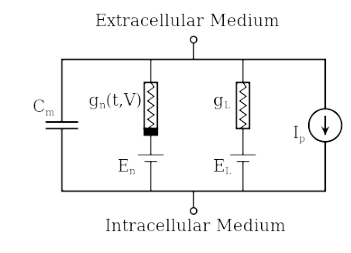

In [3]:
# Hodgkin-Huxley Equivalent Circuit
figs("hhmodel")

(Time Dependence of Conductances)

The conductances themselves are somewhat complicated as well. As we saw, channels can be active or inactive. The true Hodgkin-Huxley model uses a complicated form for activation/inactivation using multiple variables. Here, we are using something simpler.

We represent the fraction of active channels of some type as another variable $p$. The conductance is then 

$$g_i(t,V) = p_i(t,V) g_i^0$$

Here, $g_i^0$ is the conductance in the active state (assuming zero conductance in the inactive state).

(Differential Equations for Active Fraction)

These equations are then governed by another differential equation:

$$ \frac{dp(t,V)}{dt} = \frac{p_\infty(V)-p(t,V))}{r_p(V)} $$

This is saying:

- after an infinite of time, at this voltage, there is some fraction $p_\infty(V)$ of channels that would be active
- the number of channels converting from inactive-to-active or vice versa is proportional to the difference between the current fraction of active channels and the value it would have at infinity

(Confused?)

Let's thing about this again at the level of individual channels.

(One Channel)

- each channel can be in two states (or three states)
- channels transition between states as a continuous Markov process
- transitions are given by a transition rate
- the transition rate gives the number of transitions per second
- transition rates are voltage dependent


(Many Channels)

- consider a large population of $N$ channels
- let $n_1=p_1 N$, $n_2=p_2 N$ be channels in states 1 and 2
- let $\rho_{12}$ and $\rho_{21}$ be transition rates
- the total number of channels transitioning $1\rightarrow 2$ per unit time is $n_1\rho_{12}$
- we can write this as $dn_1 = n_1 \rho_{12} dt$
- we can also divide by $N$ and write it as $dp_1 = p_1 \rho_{12} dt$
- after a time, we reach balance, where $n_1\rho_{12}=n_2\rho_{21}$
- this is the $p_\infty$ above
- for voltage-sensitive channels, transition rates are functions of $V$

(Differential Equations)

If you make $p_1$, $p_2$ continuous and work through this, you get Hodgkin-Huxley-style equations.

Note that sodium channels can be in three states and potassium channels in two states.

# Simulating Hodgkin-Huxley

Here is a very rough simulation of these equations, using voltage dependent rates and voltage dependent channel fractions.


Let's start with some parameters:



In [233]:
N = 50000 # number of time steps
dt = 0.001 # size of time step
t = 0.0 # starting time
V = -60 # starting voltage
pK = 0.0 # starting fraction of potassium channels activiated
pNa = 0.0 # starting fraction of sodium channels activated

The target fraction of channels for voltage gated sodium channels above threshold; we make this a parameter to "poison" the model later by preventing activation.



In [234]:
pNai_active = 1.0

We start by updating the conductance from the voltate dependent sodium channels.
We do this by first updating the fraction of activated channels (`pNai`) and then updating
the actual conductance.

The actual Hodkin-Huxley model uses more complicated voltage and time dependencies, but we just use simple thresholds and corresponding rates.

The parameters are arbitrary. In practice, they are found by fitting actual observed behavior of neurons, in addition to making sure that all the units work out correctly and are reasonable.



In [239]:
def update_gNa():
    global V,pNa,pK,t,dt,gNa,gK,pKi,pNa
    # compute target fraction active at this voltage
    pNai = 0.0001 if V<-40 else pNai_active
    # compute rate of conversion for voltage
    rNa = 11.0 
    # compute the actual fraction active
    pNa = clip(pNa+(pNai-pNa) * rNa * dt,0,1)
    # update actual conductance
    gNa = pNa * 1.0 + (1-pNa) * 0.0001

Now we do the same for the potassium channels.



In [240]:
def update_gK():
    global V,pNa,pK,t,dt,gNa,gK,pKi,pNa
    # compute target fraction active at this voltage
    pKi = 0.001 if V<40 else 1.0
    # compute rate of conversion (example is unphysiological)
    rK = 1.0 if V<40 else 1000.0
    # compute the actual fraction active
    pK = clip(pK+(pKi-pK) * rK * dt,0,1)
    # update actual conductance
    gK = pK * 5.0 + (1-pK) * 0.0001

In the main loop, we update the conductances, compute the ionic current, and inject the external current. Then we update the voltage.



In [241]:
def update():
    global V,pNa,pK,t,dt,gNa,gK,pKi,pNa
    update_gK()
    update_gNa()
    gl = 0.1
    ionic = gK*(V-(-75))+gNa*(V-55)+gl*(V-(-60))
    external = 300.0 if (t>1.0 and t<1.1) else 0.0
    dV = (external - ionic) * dt
    V = clip(V+dV,-100,100)

Let's run this in a loop and plot the result.



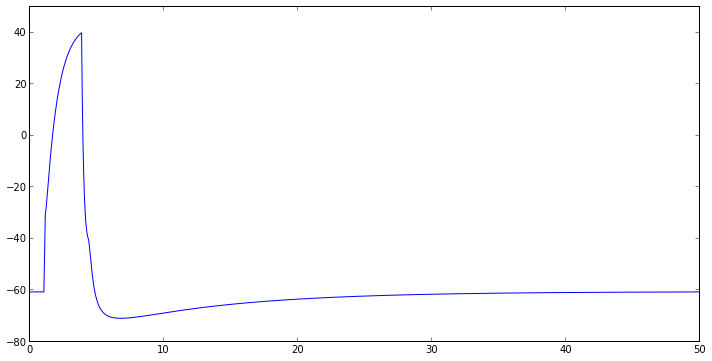

In [242]:
Vs = []
pKs = []
pNas = []
for step in range(N):
    Vs.append(V)
    t = step*dt
    update()
ts = arange(N)*dt
ylim([-80,50])
plot(ts,Vs)
#:h:1.5

That looks like an action potential, except a little jagged; that's the result of using different nonlinearities from the "true" Hodgkin Huxley model.

Still, this might just be a passive response to the injected current. To see what it is, let's "poison" the sodium channels so that they can't be activated by voltage anymore.

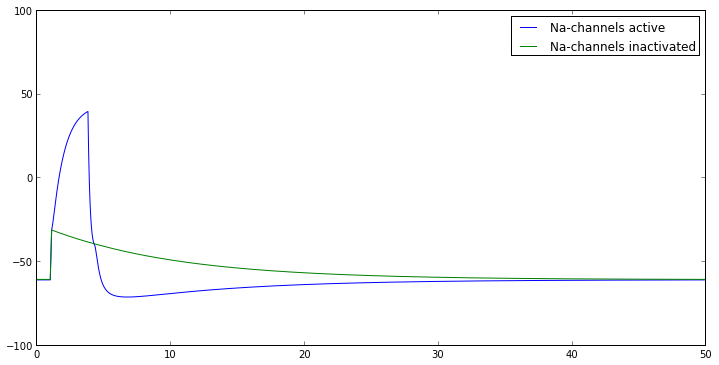

In [245]:
# action potential
pNai_active = 0.001
xVs = []
for step in range(N):
    xVs.append(V)
    t = step*dt
    update()
ts = arange(N)*dt
ylim([-100,100])
plot(ts,Vs,label="Na-channels active")
plot(ts,xVs,label="Na-channels inactivated")
legend()

# Spatial Propagation of Action Potentials

(cable theory)

The above differential equations do not take into account any kind of spatial dependencies, so they don't actually describe the propagation of the action potential. To do that, we need a second kind of model, namely a model of how signals spread along an axon.

Axons are essentially a conductor (the cytosol or contents of the cell) wrapped by an insulator, contained in water.

This is the same setting as an _undersea cable_, and the resulting electrical theory has been developed for transatlantic cables.



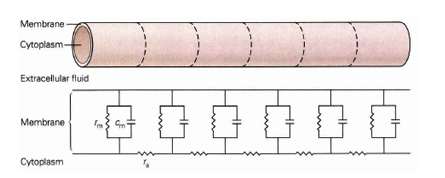

In [17]:
# cable theory
fig("membrane-circuit")

(cable theory)

If we go to the spatial and temporal limit, the structure above can be described by
a partial differential equation:

\begin{equation}
\frac{\partial V}{\partial t} = \frac{\lambda^2}{\tau}\frac{\partial^2 V}{\partial x^2} - \frac{1}{\tau}V
\end{equation}

You can derive this equation either from electrical theory, or simply by thinking about how voltages and currents flow in an electrical circuit.

Let's simulate this partial differential equation.

We start by generating an initial distribution of voltages.



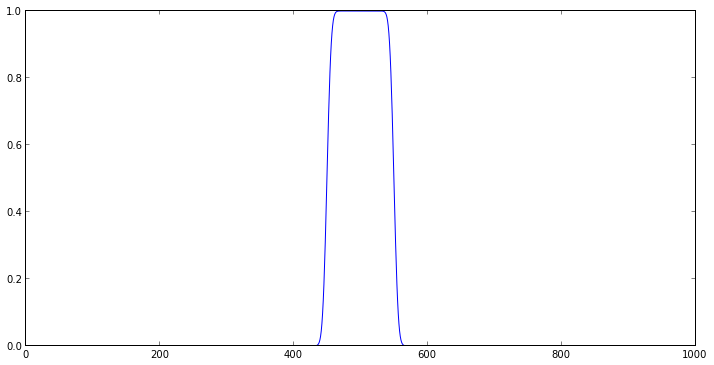

In [33]:
from scipy.ndimage import filters
V = zeros(1000)
V[450:550] = 1.0
V = filters.gaussian_filter(V,5.0)
plot(V)
initial = V

Now we let the differential equation evolve, with small time steps. We're just setting all the parameters to 1 and don't have any external voltage applied.



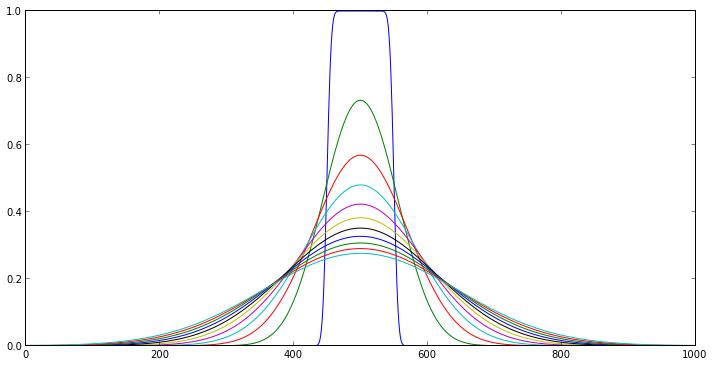

In [36]:
V = initial.copy()
for i in range(100001):
    dV = -2*V+roll(V,-1)+roll(V,1)
    V += 0.1*dV
    if i%10000==0: plot(V)

The usual neurophysiological experiment is to inject a current, which leads to slightly different boundary conditions.



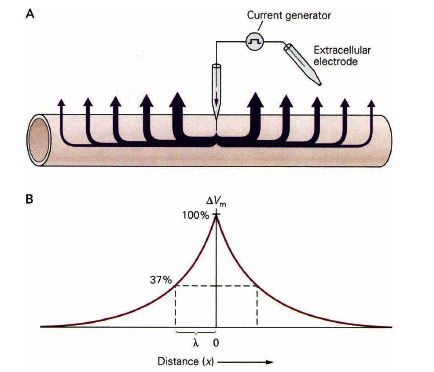

In [37]:
# signal spread with current generator
fig("membrane-signal-spread")